In [1]:
!pfda download file-GqxPZZj07qQXvQ9YyByJjKfk-1
!pfda download file-GqxPYqj07qQfxPP0GJQ33ZYQ-1
!pfda download file-GqxPYbj07qQfQ0g8GzY9xBPG-1

>> Preparing to download
     File Size :  120KiB
>> Output File :  /home/miguelp95/projects/BCR-SEQC/resource_paper_figures/nextseq_hc_reports.tar
                  13.3% (16KiB of 120KiB)
                  16.7% (20KiB of 120KiB)
                  41.3% (49.58KiB of 120KiB)
                  48.0% (57.58KiB of 120KiB)
                  71.9% (86.29KiB of 120KiB)
                  81.9% (98.29KiB of 120KiB)
                  92.7% (111.3KiB of 120KiB)
                  96.1% (115.3KiB of 120KiB)
                  100.0% (120KiB of 120KiB)
>> Done!

>> Preparing to download
     File Size :  120KiB
>> Output File :  /home/miguelp95/projects/BCR-SEQC/resource_paper_figures/miseq_hc_reports.tar
                  10.0% (12KiB of 120KiB)
                  13.3% (16KiB of 120KiB)
                  28.0% (33.58KiB of 120KiB)
                  31.3% (37.58KiB of 120KiB)
                  34.6% (41.58KiB of 120KiB)
                  41.3% (49.58KiB of 120KiB)
                  51.3% (61.58KiB 

In [2]:
import tarfile
import os

tar_files = ['miseq_hc_reports.tar', 'nextseq_hc_reports.tar', 'xleap_hc_reports.tar']

for tar_file_path in tar_files:
    if os.path.exists(tar_file_path):
        with tarfile.open(tar_file_path, 'r') as tar:
            tar.extractall()
        print(f"Extraction complete for {tar_file_path}")
    else:
        print(f"File not found: {tar_file_path}")


Extraction complete for miseq_hc_reports.tar
Extraction complete for nextseq_hc_reports.tar
Extraction complete for xleap_hc_reports.tar


In [32]:
import pandas as pd
import glob

def combine_tsv_files(pattern, group_name):
    # Find all files matching the pattern
    files = glob.glob(pattern)
    
    values_list = []
    file_names = []

    
    for file in files:
        df = pd.read_csv(file, sep='\t')
        values_list.append(df.iloc[0])  
        file_name = os.path.basename(file).replace('.tsv', '')
        file_names.append(file_name)  
    column_names = pd.read_csv(files[0], sep='\t').columns
    
    combined_df = pd.DataFrame(values_list, columns=column_names)
    combined_df.index = file_names
    combined_df = combined_df.sort_index()

    combined_df.to_csv(f'{group_name}_combined.tsv', sep='\t', index=False)
    
    return combined_df

miseq_df = combine_tsv_files('*L001_report.tsv', 'MiSeq')
nextseq_df = combine_tsv_files('*Heavy-Chain_report.tsv', 'NextSeq')
xleap_df = combine_tsv_files('*HC_report.tsv', 'Xleap')

columns_to_extract = [
    'align.alignmentsFailed.NoHitsPercents',
    'align.alignmentsFailed.NoCDR3PartsPercents',
    'align.alignmentsFailed.NoVHitsPercents',
    'align.alignmentsFailed.NoJHitsPercents',
    'align.alignmentsFailed.VAndJOnDifferentTargetsPercents',
    'align.alignmentsFailed.LowTotalScorePercents',
    'align.alignmentsFailed.NoBarcodePercents',
    'align.successAlignedPercents'
]

miseq_filtered_df = miseq_df[columns_to_extract]
nextseq_filtered_df = nextseq_df[columns_to_extract]
xleap_filtered_df = xleap_df[columns_to_extract]

miseq_filtered_df.to_csv('miseq_filtered.csv', index=True)
nextseq_filtered_df.to_csv('nextseq_filtered.csv', index=True)
xleap_filtered_df.to_csv('xleap_filtered.csv', index=True)




def calculate_means(df):
    mme_df = df.iloc[:21]
    mmc_df = df.iloc[-7:]
    mme_means = mme_df.mean()
    mmc_means = mmc_df.mean()
    return mme_means, mmc_means

miseq_mme_means, miseq_mmc_means = calculate_means(miseq_filtered_df)
nextseq_mme_means, nextseq_mmc_means = calculate_means(nextseq_filtered_df)
xleap_mme_means, xleap_mmc_means = calculate_means(xleap_filtered_df)

mme_means = pd.DataFrame({
    'MiSeq': miseq_mme_means,
    'NextSeq': nextseq_mme_means,
    'Xleap': xleap_mme_means
})

mmc_means = pd.DataFrame({
    'MiSeq': miseq_mmc_means,
    'NextSeq': nextseq_mmc_means,
    'Xleap': xleap_mmc_means
})
mme_means = mme_means.sort_values(by=mme_means.columns.tolist(), ascending=False)
mmc_means = mmc_means.sort_values(by=mmc_means.columns.tolist(), ascending=False)
mme_means = mme_means.rename(index={
    'align.successAlignedPercents': 'Aligned',
    'align.alignmentsFailed.NoHitsPercents': 'No hits',
    'align.alignmentsFailed.NoJHitsPercents': 'No J hits',
    'align.alignmentsFailed.NoVHitsPercents': 'No V hits',
    'align.alignmentsFailed.VAndJOnDifferentTargetsPercents': 'V,J on different targets',
    'align.alignmentsFailed.NoCDR3PartsPercents': 'No CDR3',
    'align.alignmentsFailed.LowTotalScorePercents': 'Low total score',
    'align.alignmentsFailed.NoBarcodePercents': 'No barcode'
})

mmc_means = mmc_means.rename(index={
    'align.successAlignedPercents': 'Aligned',
    'align.alignmentsFailed.NoHitsPercents': 'No hits',
    'align.alignmentsFailed.NoJHitsPercents': 'No J hits',
    'align.alignmentsFailed.NoVHitsPercents': 'No V hits',
    'align.alignmentsFailed.VAndJOnDifferentTargetsPercents': 'V,J on different targets',
    'align.alignmentsFailed.NoCDR3PartsPercents': 'No CDR3',
    'align.alignmentsFailed.LowTotalScorePercents': 'Low total score',
    'align.alignmentsFailed.NoBarcodePercents': 'No barcode'
})


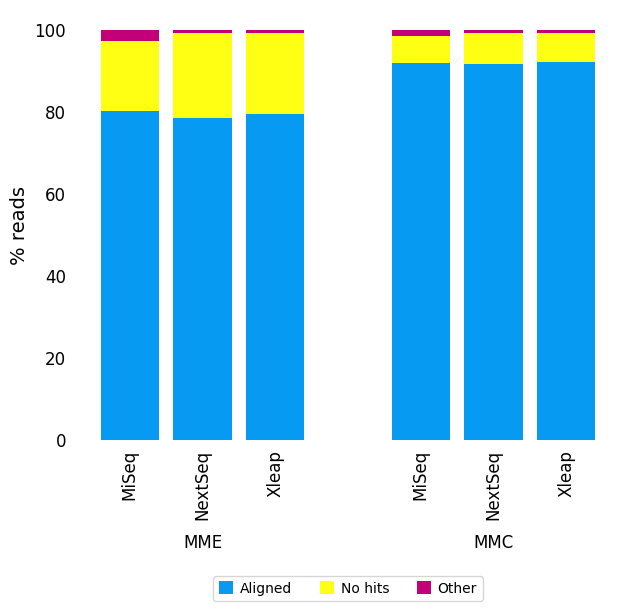

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Define colors for the categories
colors = ['#069AF3', '#FFFF14', '#C20078']

# Combine all other categories into "Other"
mme_means = mme_means.copy()
mmc_means = mmc_means.copy()

other_mme = mme_means.loc[['No J hits', 'No V hits', 'V,J on different targets', 'No CDR3', 'Low total score', 'No barcode']].sum()
other_mmc = mmc_means.loc[['No J hits', 'No V hits', 'V,J on different targets', 'No CDR3', 'Low total score', 'No barcode']].sum()

mme_means = pd.concat([mme_means.loc[['Aligned', 'No hits']], 
                       pd.DataFrame([other_mme], columns=mme_means.columns, index=['Other'])])
mmc_means = pd.concat([mmc_means.loc[['Aligned', 'No hits']], 
                       pd.DataFrame([other_mmc], columns=mmc_means.columns, index=['Other'])])


# Create figure and axis
fig, ax = plt.subplots(figsize=(6.4, 6.4))

# Define positions for bars
mme_positions = list(range(len(mme_means.columns)))
mmc_positions = [pos + len(mme_means.columns) + 1 for pos in range(len(mmc_means.columns))]

# Plot MME bars
bottom_mme = [0] * len(mme_means.columns)
for i, row in enumerate(mme_means.index):
    bars = ax.bar(mme_positions, mme_means.loc[row], bottom=bottom_mme, color=colors[i], label=row)
    for bar in bars:
        bar.set_edgecolor('none') 
    bottom_mme = [bottom_mme[j] + mme_means.loc[row, col] for j, col in enumerate(mme_means.columns)]

# Plot MMC bars
bottom_mmc = [0] * len(mmc_means.columns)
for i, row in enumerate(mmc_means.index):
    bars = ax.bar(mmc_positions, mmc_means.loc[row], bottom=bottom_mmc, color=colors[i])
    for bar in bars:
        bar.set_edgecolor('none')  
    bottom_mmc = [bottom_mmc[j] + mmc_means.loc[row, col] for j, col in enumerate(mmc_means.columns)]

# Automatically create the legend from the bar labels
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3, fontsize=10, handletextpad=0.5, markerscale=0.5, handleheight=1, handlelength=1, labelspacing=0.2)

# Labels and formatting
ax.set_ylabel('% reads', fontsize=14)
plt.xticks(ticks=mme_positions + mmc_positions, labels=mme_means.columns.tolist() + mmc_means.columns.tolist(), rotation=90, fontsize=12)
plt.text(len(mme_means.columns) / 2 - 0.5, -max(bottom_mme) * 0.25, 'MME', ha='center', va='center', fontsize=12)
plt.text(len(mme_means.columns) + len(mmc_means.columns) / 2 + 0.5 , -max(bottom_mmc) * 0.25, 'MMC', ha='center', va='center', fontsize=12)

# Remove unnecessary spines and adjust layout
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax.tick_params(axis='y', which='both', left=False, right=False, labelbottom=True)
ax.tick_params(axis='y', labelsize=12)
plt.tight_layout()

# Save and display the plot
plt.savefig('Figure4A.svg')
plt.show()


In [ ]:
!pfda upload-file Figure4A.tiff -space-id 216 -folder-id 8491914
!pfda upload-file miseq_filtered.csv -space-id 216 -folder-id 8491914
!pfda upload-file nextseq_filtered.csv -space-id 216 -folder-id 8491914
!pfda upload-file xleap_filtered.csv -space-id 216 -folder-id 8491914
